In [1]:
install.packages('dplyr')
install.packages('ggplot2')
install.packages('lme4')
install.packages('ggeffects')
install.packages('tidyr')
install.packages('broom')


The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages

The downloaded binary packages are in
	/var/folders/ws/dmbkn8cx75l33lp2zph5rpbw0000gn/T//RtmpZiEbch/downloaded_packages


In [2]:
library(dplyr)
library(ggplot2)
library(lme4)
library(ggeffects)
library(tidyr)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: Matrix


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack




In [3]:
vf = read.csv('von_frey_dataset.csv')

In [4]:
head(vf)

,Session,Date,Treatment,Protocol,Stage,DayNumber,Trial,ID,Latency,Reason,Scoring,Force
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,1,2024-03-12 16:21:00,CCD,AMN,PRE,0,C,DW 239,0.9,Detection,Auto,33.81
2,2,2024-03-12 16:22:00,CCD,AMN,PRE,0,C,DW 239,0.1,Detection,Auto,5.09
3,3,2024-03-12 16:22:00,CCD,AMN,PRE,0,C,DW 239,0.8,Detection,Auto,31.31
4,4,2024-03-12 16:22:00,CCD,AMN,PRE,0,I,DW 239,0.5,Detection,Auto,21.32
5,5,2024-03-12 16:23:00,CCD,AMN,PRE,0,I,DW 239,2.6,Detection,Auto,75.00
6,6,2024-03-12 16:23:00,CCD,AMN,PRE,0,I,DW 239,0.5,Detection,Auto,21.32


In [5]:
tail(vf)

,Session,Date,Treatment,Protocol,Stage,DayNumber,Trial,ID,Latency,Reason,Scoring,Force
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>
2353,3984,2025-07-24 09:33:47,CCD,AMN,POST,22,C,DW368,4.1,Detection,Auto,40.76
2354,3985,2025-07-24 09:34:26,CCD,AMN,POST,22,C,DW368,4.5,Detection,Auto,44.74
2355,3986,2025-07-24 09:34:47,CCD,AMN,POST,22,C,DW368,1.5,Detection,Auto,15.23
2356,3987,2025-07-24 09:35:18,CCD,AMN,POST,22,C,DW368,2.2,Detection,Auto,22.52
2357,3988,2025-07-24 09:35:29,CCD,AMN,POST,22,C,DW368,3.5,Detection,Auto,35.79
2358,3989,2025-07-24 09:35:39,CCD,AMN,POST,22,C,DW368,3.4,Detection,Auto,33.47


In [6]:
unique(vf$Stage)

[1] "PRE"  "POST"

In [7]:
unique(vf$Treatment)

[1] "CCD"

In [8]:
unique(vf$Trial)

[1] "C" "I"

In [9]:
summary(vf)

    Session           Date            Treatment           Protocol        
 Min.   :   1.0   Length:2358        Length:2358        Length:2358       
 1st Qu.: 239.0   Class :character   Class :character   Class :character  
 Median : 473.5   Mode  :character   Mode  :character   Mode  :character  
 Mean   :1407.0                                                           
 3rd Qu.:3399.8                                                           
 Max.   :3989.0                                                           
    Stage             DayNumber        Trial                ID           
 Length:2358        Min.   : 0.00   Length:2358        Length:2358       
 Class :character   1st Qu.: 4.00   Class :character   Class :character  
 Mode  :character   Median :11.00   Mode  :character   Mode  :character  
                    Mean   :10.72                                        
                    3rd Qu.:16.00                                        
                    Max.   :32.

In [17]:
#check for missing values 
is.na(vf)

Session,Date,Treatment,Protocol,Stage,DayNumber,Trial,ID,Latency,Reason,Scoring,Force
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [11]:
# create two subsets based on Trial (I and C)
vf_i = subset(vf, Trial == 'I')
vf_c = subset(vf, Trial == 'C')

# Boxplots
To understand the overall distribution of data points (withdrawal force) PRE and POST surgery on either side. 

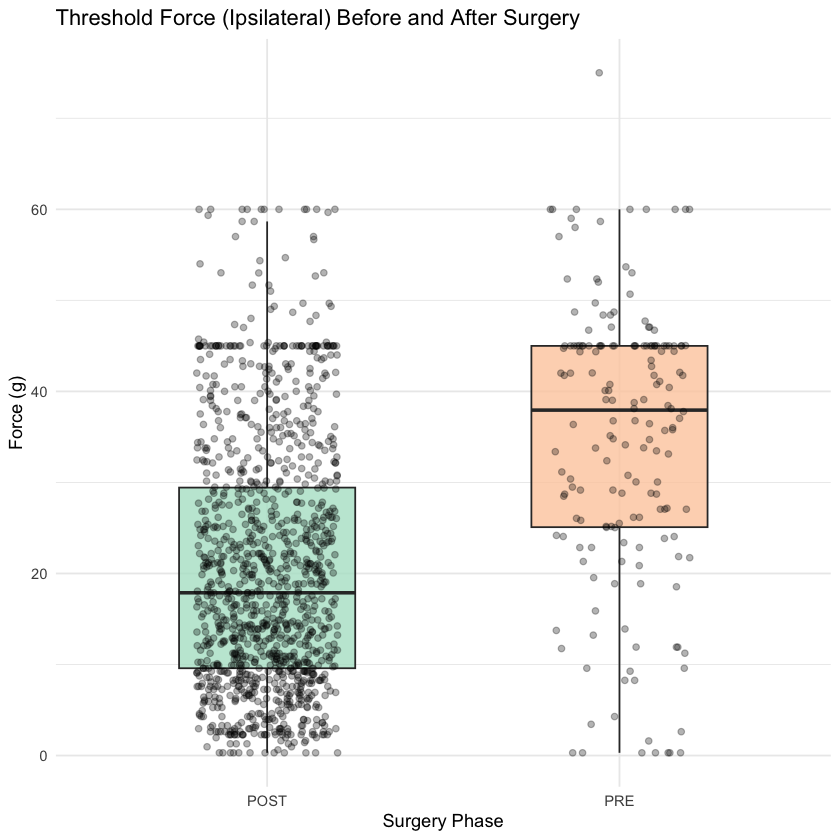

In [12]:
ggplot(vf_i,aes(x = Stage, y = Force, fill= Stage))+
      geom_boxplot(width = 0.5, alpha = 0.8, outlier.shape = NA)+ 
      geom_jitter(width = 0.2, alpha = 0.3, color = 'Black' )+ 
      labs (
          title = 'Threshold Force (Ipsilateral) Before and After Surgery', 
          x = 'Surgery Phase', 
          y = 'Force (g)'
      )+ 
theme_minimal() +
  scale_fill_brewer(palette = "Pastel2") +
  theme(legend.position = "none")

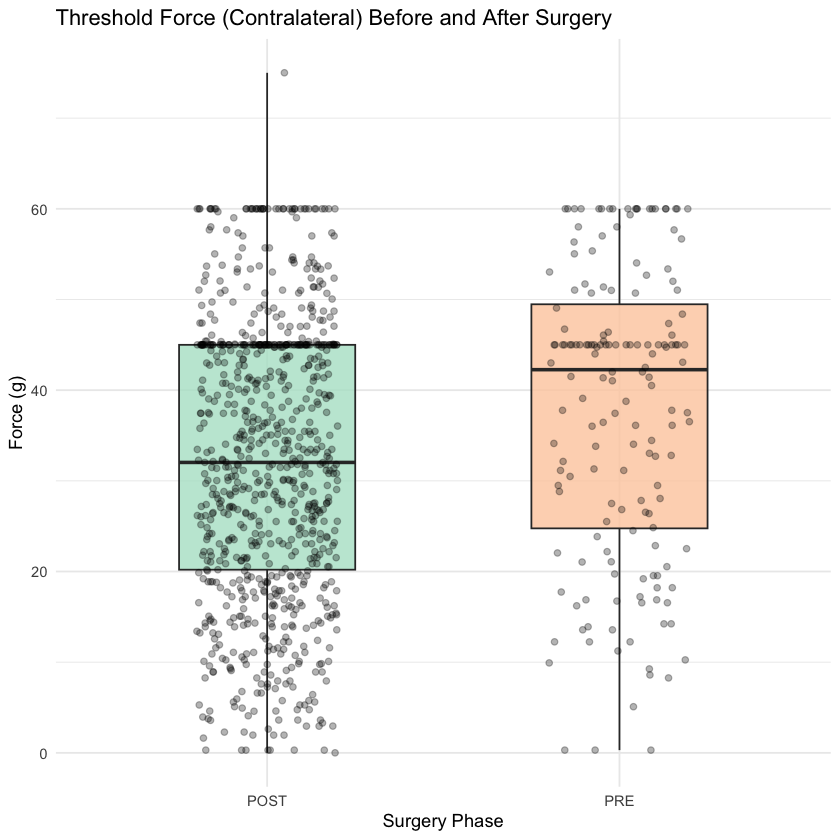

In [13]:
ggplot(vf_c,aes(x = Stage, y = Force, fill= Stage))+
      geom_boxplot(width = 0.5, alpha = 0.8, outlier.shape = NA)+ 
      geom_jitter(width = 0.2, alpha = 0.3, color = 'Black' )+ 
      labs (
          title = 'Threshold Force (Contralateral) Before and After Surgery', 
          x = 'Surgery Phase', 
          y = 'Force (g)'
      )+ 
theme_minimal() +
  scale_fill_brewer(palette = "Pastel2") +
  theme(legend.position = "none")

## Histograms 
To check the distribution of the dataset to pick the correct statistical tests

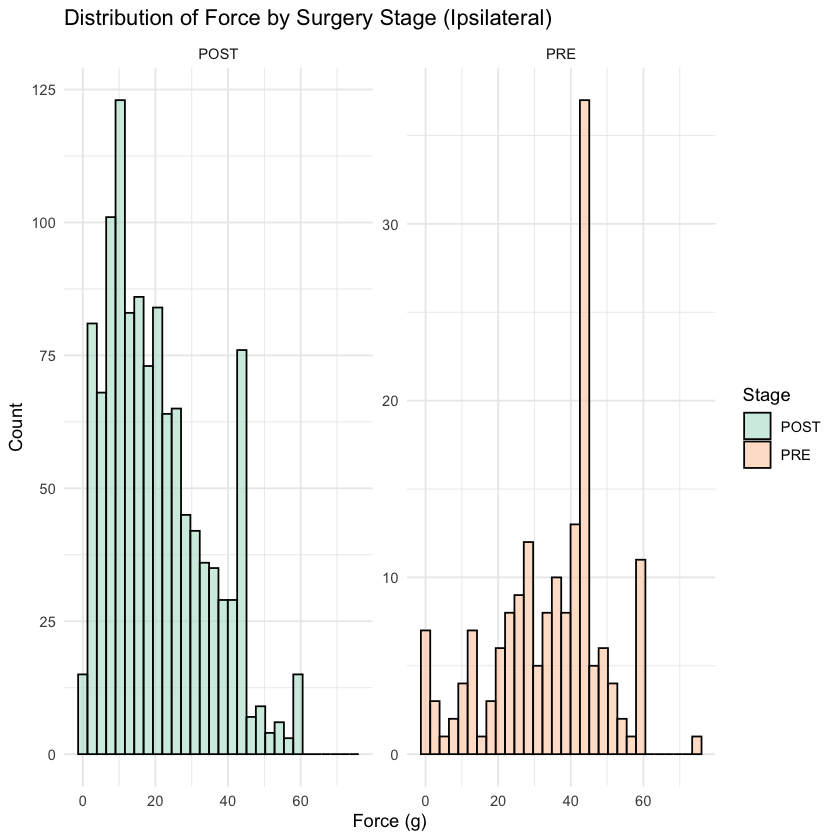

In [23]:
library(ggplot2)

ggplot(vf_i, aes(x = Force, fill = Stage)) +
  geom_histogram(alpha = 0.6, bins = 30, color = "black") +
  facet_wrap(~ Stage, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Distribution of Force by Surgery Stage (Ipsilateral)",
    x = "Force (g)",
    y = "Count"
  ) +
  scale_fill_brewer(palette = "Pastel2")

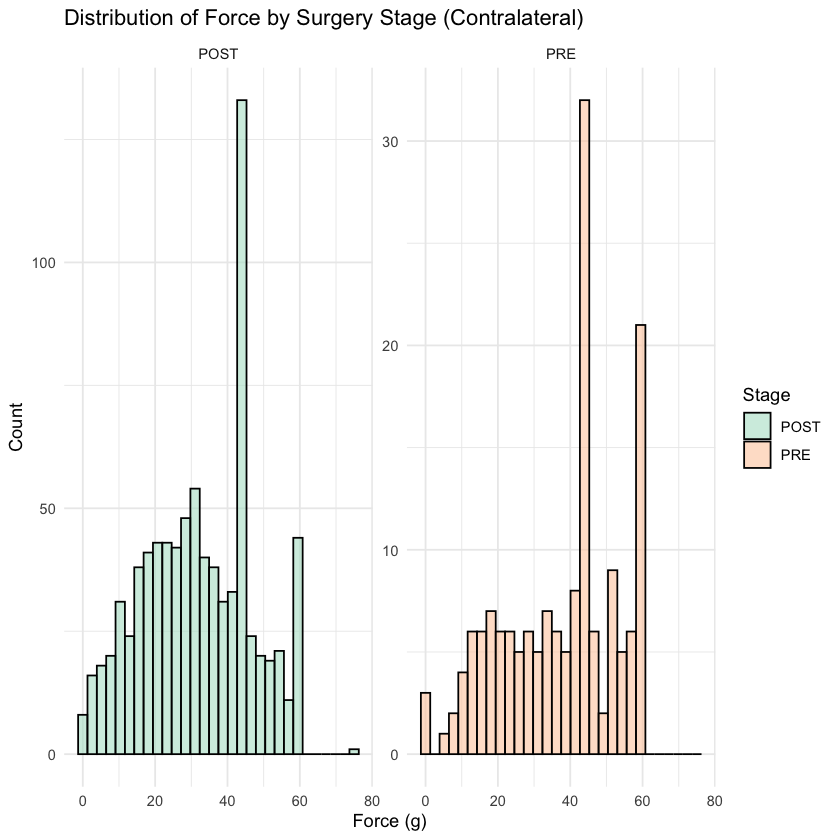

In [15]:
library(ggplot2)

ggplot(vf_c, aes(x = Force, fill = Stage)) +
  geom_histogram(alpha = 0.6, bins = 30, color = "black") +
  facet_wrap(~ Stage, scales = "free_y") +
  theme_minimal() +
  labs(
    title = "Distribution of Force by Surgery Stage (Contralateral)",
    x = "Force (g)",
    y = "Count"
  ) +
  scale_fill_brewer(palette = "Pastel2")

The above mentioned histograms do not have a bell shape that is characteristic of normal distribution. This means that our data is skewed and therefore points us in the direction of non-parametric statistical tests such as the Wilcoxon signed-rank test instead of parametric tests such as the t-test. 

## Group comparisons

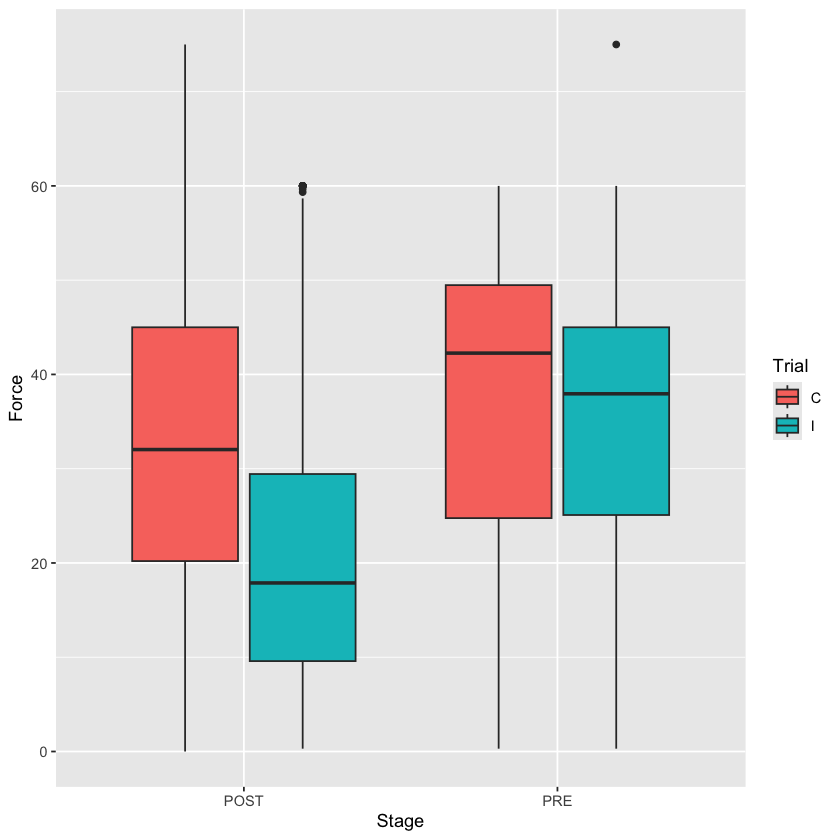

In [21]:
ggplot(vf, aes(x=Stage, y=Force, fill=Trial)) +
  geom_boxplot()

While there wasn't a huge difference in the median withdrawal force threshold before surgery between the ipsilateral and contralateral paw, we do observe a significant decline in the median force on the ispilateral side (operated side). The slight decline in the contralateral threshold can be attributed to compensatory behaviour. 

## Spaghetti plots 
To understand individual trajectories pre and post surgery on each side. 

In [27]:
vfi_median_per_rat = vf_i %>%
  group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop")

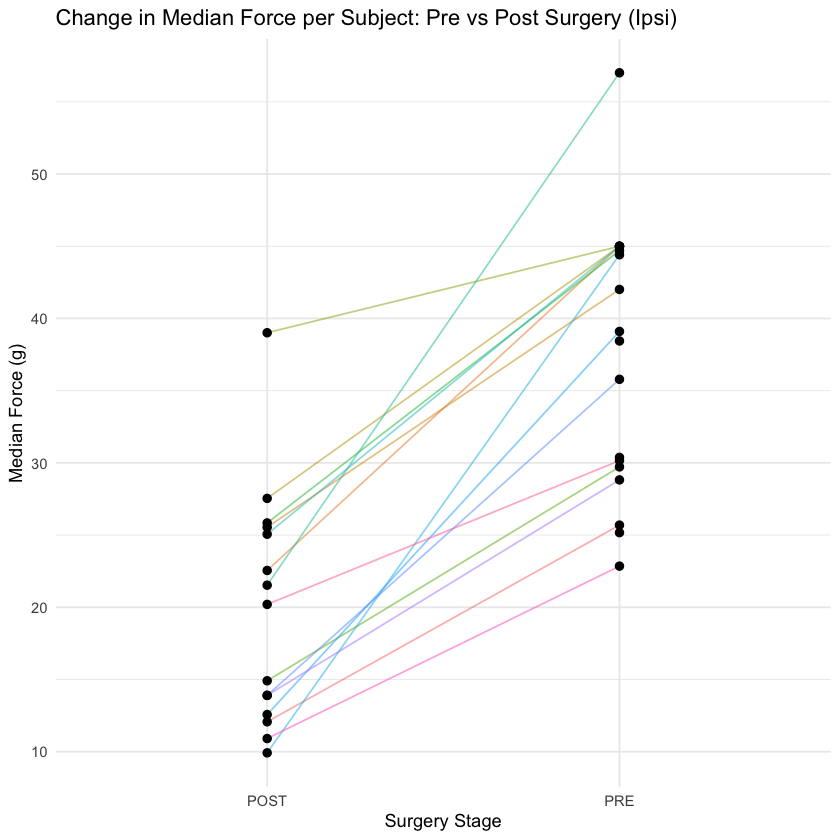

In [28]:
ggplot(vfi_median_per_rat, aes(x = Stage, y = MedianForce, group = ID)) +
  geom_line(aes(color = ID), alpha = 0.5) +
  geom_point(size = 2) +
  labs(
    title = "Change in Median Force per Subject: Pre vs Post Surgery (Ipsi)",
    x = "Surgery Stage",
    y = "Median Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

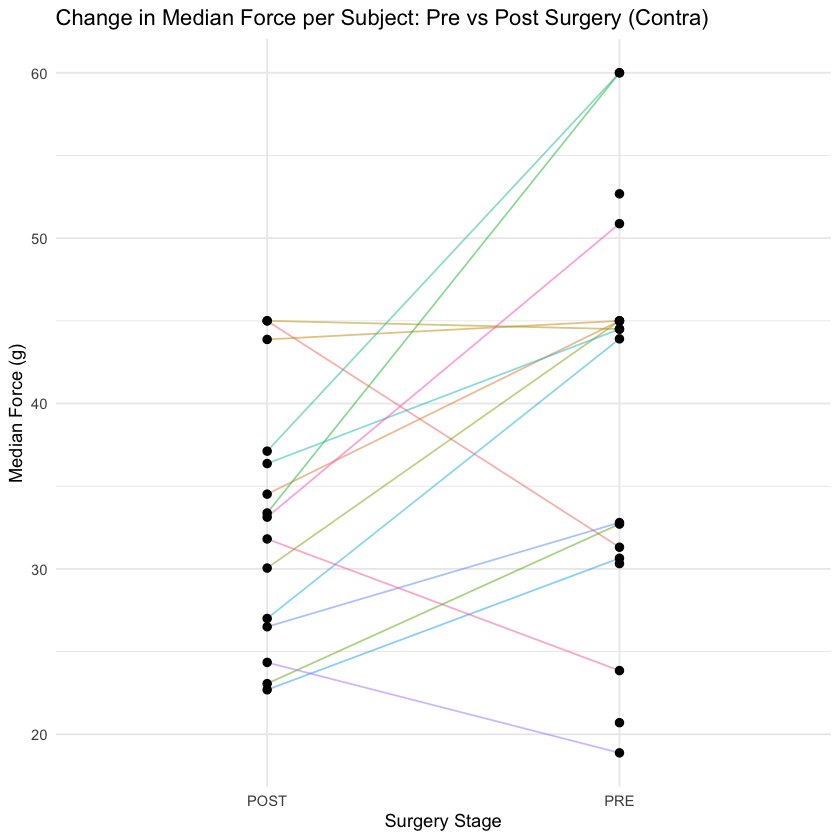

In [26]:
#repeat for contralateral side 
vfc_median_per_rat <- vf_c %>%
  group_by(ID, Stage) %>%
  summarise(MedianForce = median(Force, na.rm = TRUE), .groups = "drop")

ggplot(vfc_median_per_rat, aes(x = Stage, y = MedianForce, group = ID)) +
  geom_line(aes(color = ID), alpha = 0.5) +
  geom_point(size = 2) +
  labs(
    title = "Change in Median Force per Subject: Pre vs Post Surgery (Contra)",
    x = "Surgery Stage",
    y = "Median Force (g)"
  ) +
  theme_minimal() +
  theme(legend.position = "none")

## Statistical tests 

In [30]:
# reshape dataset to apply a paired test 
vf_i_wide = vfi_median_per_rat%>%
pivot_wider(
    names_from = Stage, 
    values_from = MedianForce
)

In [31]:
# apply statistical test (Wilcoxon signed-rank test)
wilcox.test(vf_i_wide$PRE, vf_i_wide$POST, paired =TRUE)


	Wilcoxon signed rank exact test

data:  vf_i_wide$PRE and vf_i_wide$POST
V = 120, p-value = 6.104e-05
alternative hypothesis: true location shift is not equal to 0


A wilcoxon signed-rank test comparing withdrawal threshold forces before and after surgery on the ipsilateral side showed significant decrease in the force (p<< 0.001). This suggests that surgery induced progressive mechanical allodynia on the ipsilateral side. 

In [32]:
#repeat for contralateral side 
vf_c_wide = vfc_median_per_rat%>%
pivot_wider(
    names_from = Stage, 
    values_from = MedianForce
)

In [34]:
wilcox.test(vf_c_wide$PRE, vf_c_wide$POST, paired =TRUE)


	Wilcoxon signed rank exact test

data:  vf_c_wide$PRE and vf_c_wide$POST
V = 100, p-value = 0.02155
alternative hypothesis: true location shift is not equal to 0


Results show a slight decrease in withdrawal threshold on the contralateral side as well but not nearly as significant as the operated side. 